# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

# 2. Descriptive stat

In [2]:
train_set = pd.read_csv('train_set.csv', delimiter = ';')
train_set.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [3]:
# dataset is not disbalanced
train_set.describe()

,client_id,target
count,6.000000e+03,6000.000000
mean,5.102984e+07,0.443333
std,2.881391e+07,0.496820
min,2.289900e+04,0.000000
25%,2.612906e+07,0.000000
50%,5.164080e+07,0.000000
75%,7.590927e+07,1.000000
max,9.999124e+07,1.000000


In [4]:
test_set = pd.read_csv('test_set.csv', delimiter = ';')
test_set.head()

,client_id
0,61240380
1,34114030
2,15926722
3,50598019
4,76475250


In [5]:
test_set.shape

(2656, 1)

In [6]:
transactions = pd.read_csv('transactions.csv', delimiter = ';')
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [7]:
transactions.describe()

,client_id,code,type,sum
count,1.300390e+05,130039.000000,130039.000000,1.300390e+05
mean,5.086859e+07,5594.629996,2489.372135,-1.812909e+04
std,2.872854e+07,606.087084,2253.296578,5.584445e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.244916e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


In [8]:
types = pd.read_csv('types.csv', delimiter = ';')
types.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [9]:
types.shape

(155, 2)

In [10]:
codes = pd.read_csv('codes.csv', delimiter = ';')
codes.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


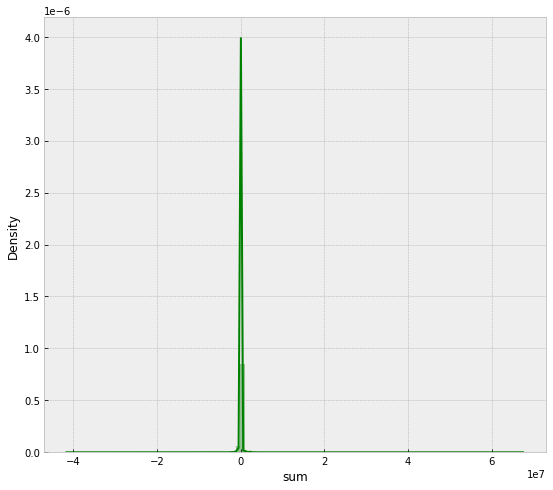

In [11]:
plt.figure(figsize=(9, 8))
sns.distplot(transactions['sum'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [12]:
popular_types = transactions['type'].value_counts()[:20]
popular_types

1010    30802
2010    20204
1030    18368
1110    17648
7070    12915
2370     6848
7010     4989
7030     2860
1100     2232
1200     1797
7071     1538
2330     1370
4071     1175
2371     1170
2011     1139
4010      583
7031      568
6110      409
4051      393
2331      390
Name: type, dtype: int64

In [13]:
popular_codes = transactions['code'].value_counts()[:20]
popular_codes

6011    27917
6010    18684
4814    18641
5411    18490
4829    11423
5499     6480
5912     2685
5541     2672
5331     2518
5812     2052
5814     1766
5999     1108
5921     1094
5311      708
5977      676
5964      630
5983      577
5211      564
5691      527
7995      469
Name: code, dtype: int64

# Feature engineering

# Filling missing values

In [14]:
types.loc[types['type_description'].isin(['н/д(нет данных)','н/д']),['type_description']]=np.nan
types.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,NaN
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


# Transactions sum

In [15]:
transcactions_sum=transactions.groupby("client_id").sum().drop(columns = ['code','type'])
transcactions_count=aggregated_1 = transactions.groupby("client_id").count().drop(columns = ['code','type', 'datetime']).rename(columns={'sum': 'count_transactions'})
transcactions_sum_count = pd.concat([transcactions_sum, transcactions_count], axis=1, join="outer")
transcactions_sum_count.head()

,sum,count_transactions
client_id,,
22899,50847.54,9
27914,74115.21,4
28753,-2589800.29,13
31385,-83525.38,13
38084,693495.66,26


# Features

In [16]:
time = transactions.drop(columns = ['code', 'type'])
time['day_number'] = transactions['datetime'].str[:3]
time['time'] = transactions['datetime'].str[-8:].str[:2]
time['time'] = time['time'].astype(int)
time.head()

,client_id,datetime,sum,day_number,time
0,96372458,421 06:33:15,-561478.94,421,6
1,24567813,377 17:20:40,67377.47,377,17
2,21717441,55 13:38:47,-44918.32,55,13
3,14331004,263 12:57:08,-3368873.66,263,12
4,85302434,151 10:34:12,-3368.87,151,10


In [17]:
buffer = transactions.groupby("client_id").median().drop(columns = 'sum')
predictors = pd.concat([transcactions_sum_count, buffer], axis=1, join="outer")
predictors = predictors.rename(columns={'sum': 'sum_of_transactions', 'code': 'Code_mode', 'type': 'Type_mode'})
predictors['Code_mode'] = predictors['Code_mode'].astype("category")
predictors['Type_mode'] = predictors['Type_mode'].astype("category")
buffer = time.drop(columns = ['sum', 'day_number', 'datetime']).groupby("client_id").mean()
buffer= buffer.rename(columns={'time': 'hour_mean'})
predictors = pd.merge(predictors, buffer, on = 'client_id', how ="left")
train_set = pd.merge(train_set, predictors, on = 'client_id', how ="left")
predictors.head()

,sum_of_transactions,count_transactions,Code_mode,Type_mode,hour_mean
client_id,,,,,
22899,50847.54,9,6010.0,4010.0,13.555556
27914,74115.21,4,5412.0,4020.0,12.250000
28753,-2589800.29,13,5661.0,1030.0,7.000000
31385,-83525.38,13,5411.0,1030.0,14.538462
38084,693495.66,26,5411.0,1210.0,13.000000


In [18]:
train_set['Transactions_tendency']='0'
train_set.loc[train_set['sum_of_transactions']>0,'Transactions_tendency']='+'
train_set.loc[train_set['sum_of_transactions']<0,'Transactions_tendency']='-'
train_set['Transaction_mean']=train_set['sum_of_transactions']/train_set['count_transactions']
train_set.head()

,client_id,target,sum_of_transactions,count_transactions,Code_mode,Type_mode,hour_mean,Transactions_tendency,Transaction_mean
0,75063019,0,89032.60,29,5411.0,1110.0,15.068966,+,3070.089655
1,86227647,1,-606058.60,27,5411.0,1110.0,11.222222,-,-22446.614815
2,6506523,0,2635753.74,53,6010.0,7030.0,13.735849,+,49731.202642
3,50615998,0,-42672.40,7,4829.0,2370.0,14.142857,-,-6096.057143
4,95213230,0,214292.66,34,5812.0,1030.0,9.617647,+,6302.725294


## 4. Cluster Analysis. Segment the customers

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Find and delete outliers from the count_transactions column.
To analyse our cluster, we need to delete the outliers, because they will interfere with further analysis.

In [20]:
#Finding the Boundary Values
print("Highest allowed",train_set['count_transactions'].mean() + 3*train_set['count_transactions'].std())
print("Lowest allowed",train_set['count_transactions'].mean() - 3*train_set['count_transactions'].std())

Highest allowed 140.27577570278666
Lowest allowed -109.66710903611998


In [21]:
#Capping on Outliers
upper_limit = train_set['count_transactions'].mean() + 3*train_set['count_transactions'].std()
lower_limit = train_set['count_transactions'].mean() - 3*train_set['count_transactions'].std()

In [22]:
#Now, apply the Capping
train_set['count_transactions'] = np.where(
    train_set['count_transactions']>upper_limit,
    upper_limit,
    np.where(
        train_set['count_transactions']<lower_limit,
        lower_limit,
        train_set['count_transactions']
    )
)

In [23]:
#Now see the statistics using “Describe” Function
train_set['count_transactions'].describe()

count    6000.000000
mean       14.325166
std        14.901623
min         1.000000
25%         5.000000
50%        11.000000
75%        19.000000
max       140.275776
Name: count_transactions, dtype: float64

In [24]:
train_set.head()

,client_id,target,sum_of_transactions,count_transactions,Code_mode,Type_mode,hour_mean,Transactions_tendency,Transaction_mean
0,75063019,0,89032.60,29.0,5411.0,1110.0,15.068966,+,3070.089655
1,86227647,1,-606058.60,27.0,5411.0,1110.0,11.222222,-,-22446.614815
2,6506523,0,2635753.74,53.0,6010.0,7030.0,13.735849,+,49731.202642
3,50615998,0,-42672.40,7.0,4829.0,2370.0,14.142857,-,-6096.057143
4,95213230,0,214292.66,34.0,5812.0,1030.0,9.617647,+,6302.725294


In [25]:
train_set.corr()

,client_id,target,sum_of_transactions,count_transactions,hour_mean,Transaction_mean
client_id,1.000000,0.003311,0.007854,-0.004135,0.016593,0.002606
target,0.003311,1.000000,-0.036427,0.069390,-0.013989,-0.061986
sum_of_transactions,0.007854,-0.036427,1.000000,-0.012241,0.013085,0.637316
count_transactions,-0.004135,0.069390,-0.012241,1.000000,-0.033385,0.089265
hour_mean,0.016593,-0.013989,0.013085,-0.033385,1.000000,0.012961
Transaction_mean,0.002606,-0.061986,0.637316,0.089265,0.012961,1.000000


Text(0, 0.5, 'Count')

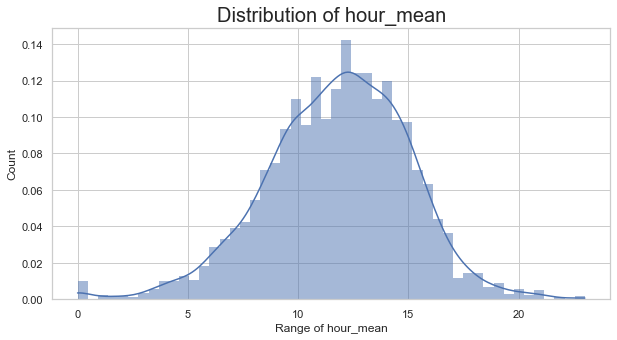

In [26]:
#Distribution of mean_hour
plt.figure(figsize=(10, 5))
sns.set(style = 'whitegrid')
sns.histplot(train_set['hour_mean'], kde=True, stat="density", linewidth=0)
plt.title('Distribution of hour_mean', fontsize = 20)
plt.xlabel('Range of hour_mean')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

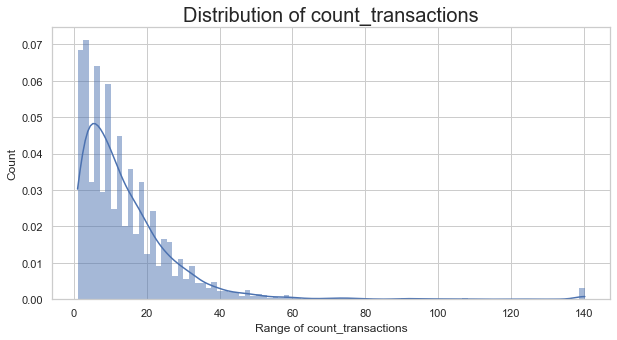

In [27]:
#Distribution of count_transactions
plt.figure(figsize=(10, 5))
sns.set(style = 'whitegrid')
sns.histplot(train_set['count_transactions'], kde=True, stat="density", linewidth=0)
plt.title('Distribution of count_transactions', fontsize = 20)
plt.xlabel('Range of count_transactions')
plt.ylabel('Count')

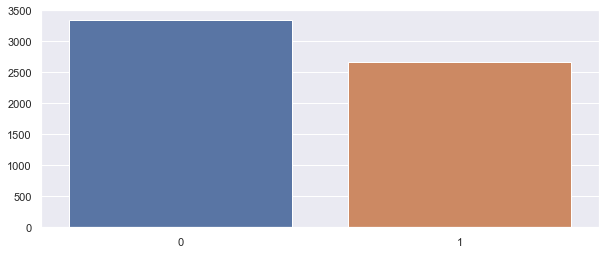

In [28]:
targets = train_set.target.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=targets.index, y=targets.values)
plt.show()

More 0(female?) customers than 1(male?).

# K-means Clustering

In [29]:
#We take just the count_transactions and mean_hour
df1 = train_set[["client_id", "target", "sum_of_transactions", "count_transactions", "hour_mean"]]
X = df1[["count_transactions","hour_mean"]]

In [30]:
#The input data
X.head()

,count_transactions,hour_mean
0,29.0,15.068966
1,27.0,11.222222
2,53.0,13.735849
3,7.0,14.142857
4,34.0,9.617647


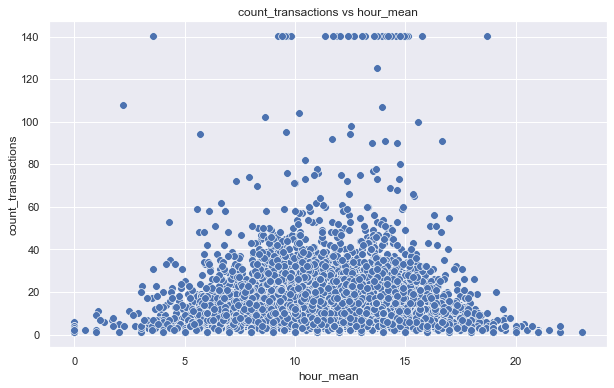

In [31]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'hour_mean',y = 'count_transactions',  data = X  ,s = 60 )
plt.xlabel('hour_mean')
plt.ylabel('count_transactions') 
plt.title('count_transactions vs hour_mean')
plt.show()

In [32]:
train_set.count_transactions.max()

140.27577570278666

In [33]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [34]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

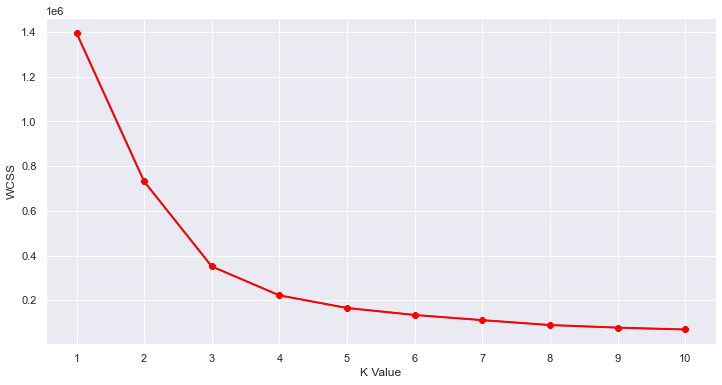

In [35]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [36]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
km1.fit(X)

y=km1.predict(X)

train_set["label"] = y
train_set.head()

,client_id,target,sum_of_transactions,count_transactions,Code_mode,Type_mode,hour_mean,Transactions_tendency,Transaction_mean,label
0,75063019,0,89032.60,29.0,5411.0,1110.0,15.068966,+,3070.089655,4
1,86227647,1,-606058.60,27.0,5411.0,1110.0,11.222222,-,-22446.614815,4
2,6506523,0,2635753.74,53.0,6010.0,7030.0,13.735849,+,49731.202642,3
3,50615998,0,-42672.40,7.0,4829.0,2370.0,14.142857,-,-6096.057143,0
4,95213230,0,214292.66,34.0,5812.0,1030.0,9.617647,+,6302.725294,4


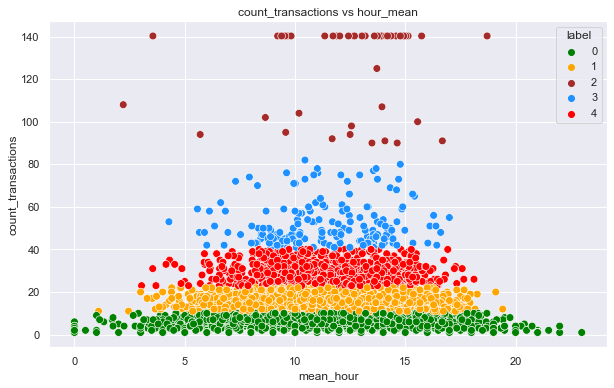

In [37]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'hour_mean',y = 'count_transactions',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = train_set,s = 60 )
plt.xlabel('mean_hour')
plt.ylabel('count_transactions') 
plt.title('count_transactions vs hour_mean')
plt.show()

We can clearly see that 5 different clusters have been formed from the data. The red cluster is the customers with the least count transactions, similarly, the blue cluster is the customers with the most count transactions.

In [38]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [39]:
df_scaled = train_set[['sum_of_transactions', 'count_transactions']]
df_scaled

,sum_of_transactions,count_transactions
0,89032.60,29.0
1,-606058.60,27.0
2,2635753.74,53.0
3,-42672.40,7.0
4,214292.66,34.0
...,...,...
5995,-114601.90,5.0
5996,-262708.36,7.0
5997,-42863.31,6.0
5998,-75992.84,19.0


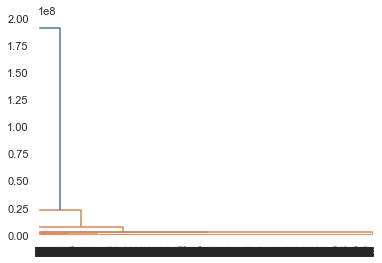

In [40]:
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

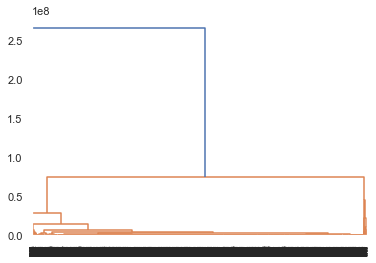

In [41]:
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

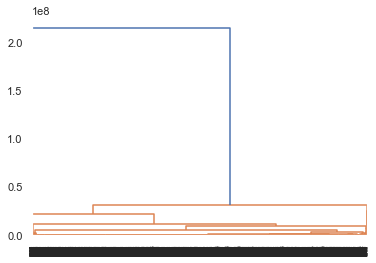

In [42]:
mergings = linkage(df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [43]:
cluster_labels1 = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels1

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
df_f = train_set
df_f['Cluster_label'] = cluster_labels1
df_f

,client_id,target,sum_of_transactions,count_transactions,Code_mode,Type_mode,hour_mean,Transactions_tendency,Transaction_mean,label,Cluster_label
0,75063019,0,89032.60,29.0,5411.0,1110.0,15.068966,+,3070.089655,4,0
1,86227647,1,-606058.60,27.0,5411.0,1110.0,11.222222,-,-22446.614815,4,0
2,6506523,0,2635753.74,53.0,6010.0,7030.0,13.735849,+,49731.202642,3,0
3,50615998,0,-42672.40,7.0,4829.0,2370.0,14.142857,-,-6096.057143,0,0
4,95213230,0,214292.66,34.0,5812.0,1030.0,9.617647,+,6302.725294,4,0
...,...,...,...,...,...,...,...,...,...,...,...
5995,71577803,0,-114601.90,5.0,7230.0,1010.0,10.800000,-,-22920.380000,0,0
5996,8128547,1,-262708.36,7.0,6010.0,2010.0,11.000000,-,-37529.765714,0,0
5997,26055781,0,-42863.31,6.0,5747.0,1560.0,16.666667,-,-7143.885000,0,0
5998,73504380,1,-75992.84,19.0,5411.0,1030.0,10.473684,-,-3999.623158,1,0


<AxesSubplot:xlabel='Cluster_label', ylabel='count_transactions'>

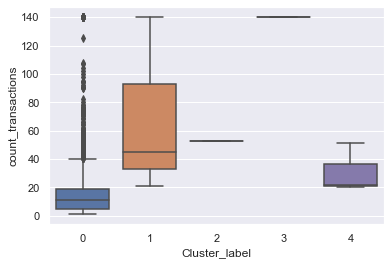

In [45]:
sns.boxplot(x='Cluster_label', y='count_transactions', data=df_f)

<AxesSubplot:xlabel='Cluster_label', ylabel='sum_of_transactions'>

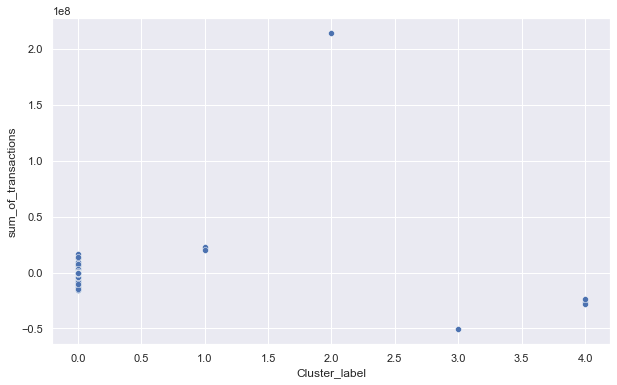

In [46]:
# Plot Cluster Id vs count_transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cluster_label', y='sum_of_transactions', data=df_f)

Hierarchical Clustering with 5 Cluster Labels

Customers with Cluster_Labels 0 and 1 are the customers with high amount of transactions as compared to other customers.

Customers with Cluster_Labels 1 are frequent customer in bank and their sum of transactions is higher than other customers.

Also Customers with Cluster_labels 0 are active customer in bank


In [47]:
tr_avg=train_set['hour_mean'].mean()
tr_min=train_set['hour_mean'].min()
tr_max=train_set['hour_mean'].max()
Diff=[tr_min,tr_avg,tr_max]
print('Average of hour:',tr_avg)
print('Minimum of hour:',tr_min)
print('Maximum of hour:',tr_max)

Average of hour: 11.792256940510223
Minimum of hour: 0.0
Maximum of hour: 23.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


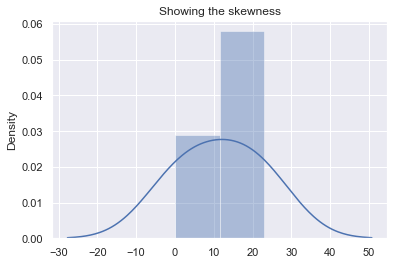

In [48]:
sns.distplot(Diff)
plt.title("Showing the skewness");

In this displot you can see the skewness between a minimum, maximum and average time spent.

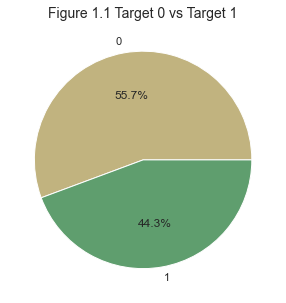

In [49]:
#grouping dataframe into two groups: Target 0 and Target 1
tr_s = train_set.groupby(['target'], as_index = False).count()

#color for parts
clrs = ['#c1b37f','#5f9e6e']

plt.figure(figsize = (14, 5))
#Displaying the pie chart.
plt.pie(tr_s['client_id'],
        labels = tr_s['target'], 
        colors = clrs, 
        autopct='%1.1f%%',#displaying the percent
        shadow=False, 
        startangle=0)

plt.title('Figure 1.1 Target 0 vs Target 1', size = 14)
plt.show()

By this pie, you can find out that the most of half is 0 target. 

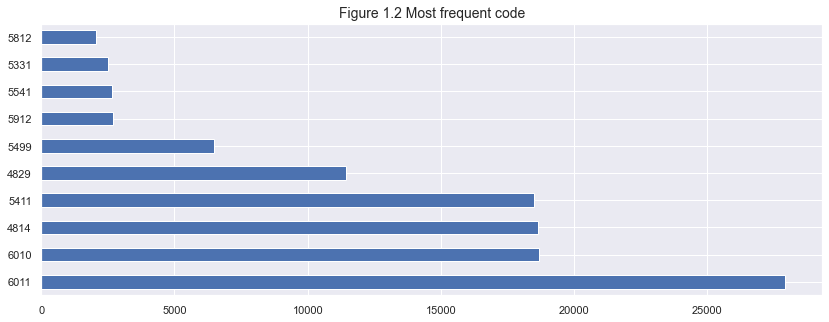

In [50]:
plt.figure(figsize = (14,5))
#Displaying the chart.
ax=transactions['code'].value_counts()[:10].plot(kind='barh')

ax.set_title('Figure 1.2 Most frequent code', size = 14)

ax.xaxis.grid(True)

This chart shows the most frequent code in transaction data. As you can see the most frequensed code is 6011, which is equal to approximately 28000.

# Conclusion

The first form of classification is the method called k-means clustering or the mobile center algorithm. As a reminder, this method aims at partitioning n observations into k clusters in which each observation belongs to the cluster with the closest average, serving as a prototype of the cluster.
For this task, we used the train_set database. 
Problems like segmenting customers are often deceptive and tricky because we are not working with any target variable in mind. We are officially in the land of unsupervised learning where we need to figure out patterns and structures without a set outcome in mind. It’s both challenging and thrilling as a data scientist.